# <span style="color:darkblue"> Lecture 12: Application 2 - Random Assignment </span>

<font size = "5">



# <span style="color:darkblue"> I. Import Libraries and Data </span>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
carfeatures = pd.read_csv("data_raw/features.csv")

# <span style="color:darkblue"> I. Random Assignment </span>

<font size = "5">

Random assignment is crucial for scientific progress ...

- The basis for medical trials
- Also used in engineering, the natural sciences and <br>
  social sciences (economics, political science, etc.)


In [4]:
# "list_status" is a list with "treatment/control" arms
# "prop_status" is the proportion in the treatment and control arms
# "size_dataset" is how many rows are contained

list_status  = ["Treatment","Control"]
prop_status  = [0.4,0.6]
size_dataset = len(carfeatures)

<font size = "5">
Random assignment


In [5]:
# The "np.random.choice" will create a vector with the status
# We will save this to a column in "carfeatures"
# Note: (i) We can always split the arguments of a function in multiple lines
#           to make it easier to read
#       (ii) 

carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status)

display(carfeatures)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
0,18.0,8,307,130,3504,12.0,C-1689780,Treatment
1,15.0,8,350,165,3693,11.5,B-1689791,Control
2,18.0,8,318,150,3436,11.0,P-1689802,Control
3,16.0,8,304,150,3433,12.0,A-1689813,Control
4,17.0,8,302,140,3449,10.5,F-1689824,Control
...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Control
394,44.0,4,97,52,2130,24.6,V-1694114,Treatment
395,32.0,4,135,84,2295,11.6,D-1694125,Control
396,28.0,4,120,79,2625,18.6,F-1694136,Control


<font size = "5">

Compute frequencies by status

In [39]:
# The command "pd.crosstab" computes frequencies
# If we add the option "normalize" it will compute proportions
# Note: The default assignment is done randomly without replacement
#       which means that the proportions are approximately the same   
#       (but not equal) to "prop_status"

frequency_table   = pd.crosstab(index = carfeatures["status"], columns = "Frequency")
proportions_table = pd.crosstab(index = carfeatures["status"],
                                columns = "Frequency",
                                normalize = True)

display(frequency_table)
display(proportions_table)


col_0,Frequency
status,
Control,251
Treatment,147


col_0,Frequency
status,
Control,0.630653
Treatment,0.369347


<font size = "5">

Query with string conditions

In [44]:
# When you have queries for text variables, it's important
# to use outer ' ' single quotations
# and inner double quotations.

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')

<font size = "5">

Treated/control should be similar

- This is the key principle of random assignment
- We can check the summary statistics

In [46]:
# The count is different because we assigned different proportions
# All other sumary statistics are approximately the same
# They are not identical because the assignment is random

display(data_treated.describe())
display(data_control.describe())

,mpg,cylinders,displacement,weight,acceleration
count,145.000000,145.000000,145.000000,145.000000,145.000000
mean,23.656552,5.558621,194.965517,2999.124138,15.622069
std,8.487383,1.735559,103.989477,862.268865,2.806626
min,9.000000,4.000000,68.000000,1760.000000,9.500000
25%,17.000000,4.000000,98.000000,2200.000000,13.900000
50%,22.000000,4.000000,144.000000,2910.000000,15.000000
75%,29.900000,8.000000,302.000000,3672.000000,17.300000
max,46.600000,8.000000,455.000000,5140.000000,24.600000


,mpg,cylinders,displacement,weight,acceleration
count,253.000000,253.000000,253.000000,253.000000,253.000000
mean,23.433202,5.395257,192.545455,2953.976285,15.537154
std,7.420168,1.681451,104.624019,839.151120,2.734372
min,10.000000,3.000000,70.000000,1613.000000,8.000000
25%,17.500000,4.000000,105.000000,2245.000000,13.800000
50%,23.000000,4.000000,151.000000,2735.000000,15.500000
75%,28.800000,6.000000,258.000000,3563.000000,17.000000
max,44.600000,8.000000,455.000000,4997.000000,24.800000


## <span style="color:darkblue"> III. Quiz Structure </span>

<font size = "5">

The day of the quiz I will ...
- Provide a dataset with information
- Give more specific instructions.
- Below, you will see the type of questions that will be asked.
- The idea is for you to apply known concepts to new data
- You have 50 minutes to complete the assignment

Questions

(exact wording may change in quiz, but exercise will be very similar)


<font size = "5">

(a) Create a function and apply it to a column

- Check Lecture 8 for how to define a function
- The function will have if/else statements and output a string
- You will use ".apply()" to create a new variable in the dataset <br>
(see Lecture 9)

In [6]:
def fn_speed(mpg):
    if (mpg >= 18):
        status = "Fast"
    elif (mpg >= 10) & (mpg < 18):
        status = "Mid"
    else:
        status = "Slow"
    return(status)


carfeatures["speed_type"] = carfeatures["mpg"].apply(fn_speed)

display(carfeatures)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status,speed_type
0,18.0,8,307,130,3504,12.0,C-1689780,Treatment,Fast
1,15.0,8,350,165,3693,11.5,B-1689791,Control,Mid
2,18.0,8,318,150,3436,11.0,P-1689802,Control,Fast
3,16.0,8,304,150,3433,12.0,A-1689813,Control,Mid
4,17.0,8,302,140,3449,10.5,F-1689824,Control,Mid
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Control,Fast
394,44.0,4,97,52,2130,24.6,V-1694114,Treatment,Fast
395,32.0,4,135,84,2295,11.6,D-1694125,Control,Fast
396,28.0,4,120,79,2625,18.6,F-1694136,Control,Fast


<font size = "5">

(b) Use queries + global variables

- You will be asked to compute certain summary statistics <br>
(mean, median, etc)
- The query will have multiple conditions
- Then subset a dataset that meets certain conditions
- See Lecture 10 for more details

In [16]:
print (carfeatures["mpg"].mean())
print (carfeatures["mpg"].median())

data_mpg_cylinders = carfeatures.query("(mpg >= 25) and (cylinders == 8)")
print (data_mpg_cylinders)

23.514572864321607
23.0
      mpg  cylinders  displacement horsepower  weight  acceleration  \
364  26.6          8           350        105    3725          19.0   

    vehicle_id   status speed_type  
364  O-1693784  Control       Fast  


<font size = "5">

(c) Use sorting + ".loc[]"

- Extract the observations with the largest values of a column
- See Lecture 10 for details

In [18]:
car_ascendingmpg = carfeatures.sort_values(by = "mpg",ascending = False)
display(car_ascendingmpg.iloc[0:5,:])

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status,speed_type
322,46.6,4,86,65,2110,17.9,M-1693322,Treatment,Fast
329,44.6,4,91,67,1850,13.8,H-1693399,Control,Fast
325,44.3,4,90,48,2085,21.7,V-1693355,Control,Fast
394,44.0,4,97,52,2130,24.6,V-1694114,Treatment,Fast
326,43.4,4,90,48,2335,23.7,V-1693366,Control,Fast


<font size = "5">

(d) Split a dataset into subsets

- You will be asked to randomly assign a status to each row
- Split the data into separate datasets using ".query()"
- This will closely follow the material in Lecture 12 (this one)
- You will need this result to answer questions (e), (f)


In [33]:
list_appearance  = ["Ugly","Cute"]
prop_appearance  = [0.9,0.1]
size_dataset = len(carfeatures)

carfeatures["appearance"] = np.random.choice(list_appearance,
                                         size = size_dataset,
                                         p = prop_appearance)

display(carfeatures)
data_ugly = carfeatures.query('appearance == "Ugly" ')
data_cute = carfeatures.query('appearance == "Cute" ')


,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status,speed_type,apperance,appearance
0,18.0,8,307,130,3504,12.0,C-1689780,Treatment,Fast,Ugly,Ugly
1,15.0,8,350,165,3693,11.5,B-1689791,Control,Mid,Ugly,Ugly
2,18.0,8,318,150,3436,11.0,P-1689802,Control,Fast,Cute,Ugly
3,16.0,8,304,150,3433,12.0,A-1689813,Control,Mid,Ugly,Ugly
4,17.0,8,302,140,3449,10.5,F-1689824,Control,Mid,Ugly,Ugly
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Control,Fast,Ugly,Ugly
394,44.0,4,97,52,2130,24.6,V-1694114,Treatment,Fast,Ugly,Ugly
395,32.0,4,135,84,2295,11.6,D-1694125,Control,Fast,Ugly,Ugly
396,28.0,4,120,79,2625,18.6,F-1694136,Control,Fast,Ugly,Ugly


<font size = "5">

(e) Create a function with four inputs $f(y,x,b0,b1)$

- Start by using "def" to define the function
- The function will include arithmetic operations (Lecture 3) <br>
and summary statistics for pandas (mean, std, min, max, etc.)
- You will be asked to test different values of $(y,x,b0,b1)$
- You will get $y$ and $x$ from the two datasets in part (d)
- Note: You will **not** be required to use the "statsmodels" library


In [41]:
def fn_math (y,x,b0,b1):
    y = (b1*x) + b0
    return (y)
fn_math (y=data_ugly["mpg"], x=data_cute["mpg"], b0=2, b1=3)

23      80.0
43      41.0
44      41.0
53      95.0
60      62.0
71      59.0
84      83.0
95      38.0
96      41.0
107     56.0
130     80.0
133     50.0
144     95.0
145     98.0
157     47.0
175     89.0
177     71.0
178     71.0
195     89.0
198    101.0
212     51.5
216     96.5
232     50.0
240     93.5
249     61.7
266     92.0
270     65.3
278     96.5
280     66.5
284     63.8
295    109.1
298     71.0
310    116.3
315     74.9
319     95.9
325    134.9
339     81.8
360     94.1
364     81.8
374     71.0
390     98.0
392     83.0
Name: mpg, dtype: float64

<font size = "5">

(f) Create two overlapping histogram plots

- You will use a variable from the two datasets in (d)
- You need to use the "alpha" option to make the graphs semitransparent
- You will need to add a legend, label the axes, and the title
- Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups

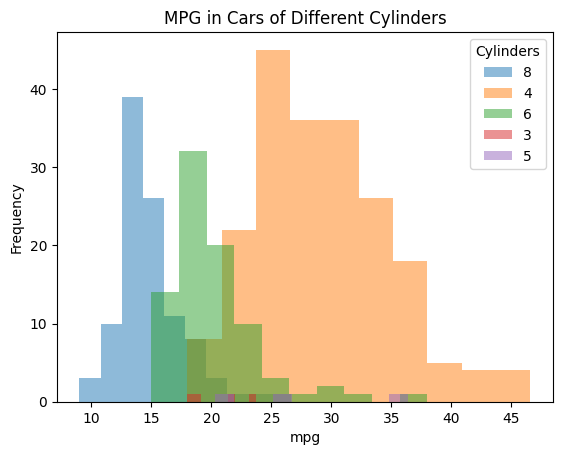

In [43]:
# the loop subsets the data so that you create separate datasets for each cylinder-type in the cars.
list_features = pd.unique (carfeatures ["cylinders"])
for cylinders in list_features:
    df = carfeatures.query("cylinders == @cylinders")
    plt.hist(x = df["mpg"], alpha = 0.5)

plt.xlabel("mpg")
plt.ylabel("Frequency")
plt.title("MPG in Cars of Different Cylinders")
plt.legend(labels = list_features,
            title = "Cylinders")

plt.show()